In [5]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from keras.layers import Input,Conv2D,MaxPool2D,UpSampling2D
from keras.models import Model
from keras.optimizers import  RMSprop

def extract_data(filename,num_images):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(28 * 28 * num_images)
        data = np.frombuffer(buf,dtype=np.uint8).astype(np.float32)
        data = data.reshape(num_images,28,28)
        return data


train_data = extract_data('C:\\Users\\HyunA\\PycharmProjects\\CNN_Deeplearning\\Data\\Dataset\\notMNIST-to-MNIST-master\\notMNIST-to-MNIST-master\\train-images-idx3-ubyte.gz',60000)
test_data = extract_data('C:\\Users\\HyunA\\PycharmProjects\\CNN_Deeplearning\\Data\\Dataset\\notMNIST-to-MNIST-master\\notMNIST-to-MNIST-master\\t10k-images-idx3-ubyte.gz',10000)

def extract_labels(filename,num_images):
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1*num_images)
        labels = np.frombuffer(buf,dtype=np.uint8).astype(np.int64)
        return labels
train_labels = extract_labels('C:\\Users\\HyunA\\PycharmProjects\\CNN_Deeplearning\\Data\\Dataset\\notMNIST-to-MNIST-master\\notMNIST-to-MNIST-master\\train-labels-idx1-ubyte.gz',60000)
test_labels = extract_labels('C:\\Users\\HyunA\\PycharmProjects\\CNN_Deeplearning\\Data\\Dataset\\notMNIST-to-MNIST-master\\notMNIST-to-MNIST-master\\t10k-labels-idx1-ubyte.gz',10000)



C:\Users\HyunA\AppData\Local\conda\conda\envs\tutorial\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Using TensorFlow backend.


In [2]:
# create dictionary of target classes 
label_dict = {
    0:'A',
    1:'B',
    2:'C',
    3:'D',
    4:'E',
    5:'F',
    6:'G',
    7:'H',
    8:'I',
    9:'J'
}

In [6]:
train_data = train_data.reshape(-1,28,28,1)
test_data = test_data.reshape(-1,28,28,1)

print(train_data.shape)
print(test_data.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [7]:
# 0-1 사이 값으로 rescale 하기
# np.max(train_data),np.max(test_data)

train_data = train_data/np.max(train_data)
test_data = test_data/np.max(test_data)

np.max(train_data),np.max(test_data)


(1.0, 1.0)

In [9]:
from sklearn.model_selection import train_test_split

train_X, valid_X, train_ground,valid_ground = train_test_split(train_data,train_labels,test_size=0.2, random_state=13)

print(train_X.shape)


(48000, 28, 28, 1)


In [38]:
print(train_X)
print(train_ground)

[[[[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.43529412]
   [0.        ]
   [0.01568628]]

  [[0.00392157]
   [0.        ]
   [0.14509805]
   ...
   [0.40784314]
   [0.        ]
   [0.01568628]]

  [[0.01568628]
   [0.        ]
   [0.5686275 ]
   ...
   [0.3764706 ]
   [0.        ]
   [0.01568628]]

  ...

  [[0.01568628]
   [0.        ]
   [0.43529412]
   ...
   [0.42745098]
   [0.        ]
   [0.01568628]]

  [[0.01176471]
   [0.        ]
   [0.29803923]
   ...
   [0.23529412]
   [0.        ]
   [0.01176471]]

  [[0.00392157]
   [0.        ]
   [0.05882353]
   ...
   [0.10196079]
   [0.        ]
   [0.00784314]]]


 [[[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.99607843]
   [1.        ]
   [0.8784314 ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.9882353 ]
   [1.        ]
   [0.6745098 ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.99215686]
   [1.        ]
   [0.43529412]]

  ...

  [[0.00784314]
   [0.00392157]
   [0.1

In [10]:
#noise 추가
noise_factor = 0.5
x_train_noisy = train_X + noise_factor * np.random.normal(loc=0.0,scale=1.0, size = train_X.shape)
x_valid_noisy = valid_X + noise_factor * np.random.normal(loc=0.0,scale=1.0, size = valid_X.shape)
x_test_noisy = test_data + noise_factor* np.random.normal(loc=0.0,scale=1.0, size = test_data.shape)

x_train_noisy = np.clip(x_train_noisy,0.,1.)
x_valid_noisy = np.clip(x_valid_noisy,0.,1.)
x_test_noisy = np.clip(x_test_noisy,0.,1.)


print(x_train_noisy.shape)

(48000, 28, 28, 1)


In [1]:
plt.figure(figsize=[5,5])

# display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train_noisy[1],(28,28))
plt.imshow(curr_img, cmap='gray')

# display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test_noisy[1],(28,28))
plt.imshow(curr_img, cmap='gray')



NameError: name 'plt' is not defined

In [27]:
# denosing autoencoder network
batch_size = 128
epoch = 2
inChannel = 1
x, y = 28,28
input_img = Input(shape=(x,y,inChannel))


In [28]:
def autoencoder(input_img):
    # encoder
    conv1 = Conv2D(32,(3,3),activation='relu',padding='same',name='conv1')(input_img)
    pool1 = MaxPool2D(pool_size=(2,2),name='pool1')(conv1)
    conv2 = Conv2D(64,(3,3), activation='relu', padding='same', name='conv2')(pool1)
    pool2 = MaxPool2D(pool_size=(2,2),name='pool2')(conv2)
    conv3 = Conv2D(128,(3,3),activation='relu', padding='same',name='conv3')(pool2)
    
    # decoder
    conv4  = Conv2D(128 ,(3,3), activation='relu', padding='same',name='conv4')(conv3)
    up1 = UpSampling2D((2,2),name='up1')(conv4)
    conv5 = Conv2D(64,(3,3),activation='relu', padding='same',name='conv5')(up1)
    up2 = UpSampling2D((2,2),name='up2')(conv5)
    decoded = Conv2D(1,(3,3), activation='sigmoid', padding='same',name='decoded')(up2)
    return decoded

In [29]:
autoencoder = Model(input_img, autoencoder(input_img))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())


In [30]:
autoencoder_trian = autoencoder.fit(x_train_noisy,train_X, batch_size=batch_size, epochs = epoch, verbose = 1, validation_data = (x_valid_noisy,valid_X))


Train on 48000 samples, validate on 12000 samples
Epoch 1/2


  128/48000 [..............................] - ETA: 12:46 - loss: 0.2102

  256/48000 [..............................] - ETA: 10:04 - loss: 0.2776

  384/48000 [..............................] - ETA: 9:08 - loss: 0.2567 

  512/48000 [..............................] - ETA: 8:42 - loss: 0.2451

  640/48000 [..............................] - ETA: 8:21 - loss: 0.2373

  768/48000 [..............................] - ETA: 8:09 - loss: 0.2305

  896/48000 [..............................] - ETA: 7:57 - loss: 0.2268

 1024/48000 [..............................] - ETA: 7:51 - loss: 0.2304

 1152/48000 [..............................] - ETA: 7:43 - loss: 0.2271

 1280/48000 [..............................] - ETA: 7:39 - loss: 0.2232

 1408/48000 [..............................] - ETA: 7:32 - loss: 0.2172

 1536/48000 [..............................] - ETA: 7:29 - loss: 0.2082

 1664/48000 [>.............................] - ETA: 7:23 - loss: 0.2304

 1792/48000 [>.............................] - ETA: 7:25 - loss: 0.2284

 1920/48000 [>.............................] - ETA: 7:21 - loss: 0.2339

 2048/48000 [>.............................] - ETA: 7:16 - loss: 0.2294

 2176/48000 [>.............................] - ETA: 7:12 - loss: 0.2240

 2304/48000 [>.............................] - ETA: 7:09 - loss: 0.2176

 2432/48000 [>.............................] - ETA: 7:06 - loss: 0.2114

 2560/48000 [>.............................] - ETA: 7:02 - loss: 0.2092

 2688/48000 [>.............................] - ETA: 6:59 - loss: 0.2117

 2816/48000 [>.............................] - ETA: 6:57 - loss: 0.2078

 2944/48000 [>.............................] - ETA: 6:54 - loss: 0.2033

 3072/48000 [>.............................] - ETA: 6:51 - loss: 0.1988

 3200/48000 [=>............................] - ETA: 6:48 - loss: 0.1944

 3328/48000 [=>............................] - ETA: 6:45 - loss: 0.1906

 3456/48000 [=>............................] - ETA: 6:45 - loss: 0.1877

 3584/48000 [=>............................] - ETA: 6:43 - loss: 0.1870

 3712/48000 [=>............................] - ETA: 6:41 - loss: 0.1854

 3840/48000 [=>............................] - ETA: 6:38 - loss: 0.1828

 3968/48000 [=>............................] - ETA: 6:35 - loss: 0.1798

 4096/48000 [=>............................] - ETA: 6:33 - loss: 0.1768

 4224/48000 [=>............................] - ETA: 6:31 - loss: 0.1740

 4352/48000 [=>............................] - ETA: 6:29 - loss: 0.1712

 4480/48000 [=>............................] - ETA: 6:27 - loss: 0.1689

 4608/48000 [=>............................] - ETA: 6:25 - loss: 0.1685

 4736/48000 [=>............................] - ETA: 6:23 - loss: 0.1676

 4864/48000 [==>...........................] - ETA: 6:21 - loss: 0.1656

 4992/48000 [==>...........................] - ETA: 6:19 - loss: 0.1634

 5120/48000 [==>...........................] - ETA: 6:18 - loss: 0.1611

 5248/48000 [==>...........................] - ETA: 6:16 - loss: 0.1589

 5376/48000 [==>...........................] - ETA: 6:14 - loss: 0.1569

 5504/48000 [==>...........................] - ETA: 6:13 - loss: 0.1551

 5632/48000 [==>...........................] - ETA: 6:11 - loss: 0.1545

 5760/48000 [==>...........................] - ETA: 6:09 - loss: 0.1539

 5888/48000 [==>...........................] - ETA: 6:08 - loss: 0.1523

 6016/48000 [==>...........................] - ETA: 6:06 - loss: 0.1505

 6144/48000 [==>...........................] - ETA: 6:05 - loss: 0.1487

 6272/48000 [==>...........................] - ETA: 6:03 - loss: 0.1469

 6400/48000 [===>..........................] - ETA: 6:02 - loss: 0.1450

 6528/48000 [===>..........................] - ETA: 6:00 - loss: 0.1434

 6656/48000 [===>..........................] - ETA: 5:59 - loss: 0.1421

 6784/48000 [===>..........................] - ETA: 5:57 - loss: 0.1418

 6912/48000 [===>..........................] - ETA: 5:56 - loss: 0.1413

 7040/48000 [===>..........................] - ETA: 5:54 - loss: 0.1402

 7168/48000 [===>..........................] - ETA: 5:53 - loss: 0.1388

 7296/48000 [===>..........................] - ETA: 5:52 - loss: 0.1374

 7424/48000 [===>..........................] - ETA: 5:51 - loss: 0.1361

 7552/48000 [===>..........................] - ETA: 5:49 - loss: 0.1348

 7680/48000 [===>..........................] - ETA: 5:48 - loss: 0.1336

 7808/48000 [===>..........................] - ETA: 5:47 - loss: 0.1330

 7936/48000 [===>..........................] - ETA: 5:46 - loss: 0.1325

 8064/48000 [====>.........................] - ETA: 5:45 - loss: 0.1318

 8192/48000 [====>.........................] - ETA: 5:44 - loss: 0.1307

 8320/48000 [====>.........................] - ETA: 5:42 - loss: 0.1296

 8448/48000 [====>.........................] - ETA: 5:41 - loss: 0.1285

 8576/48000 [====>.........................] - ETA: 5:39 - loss: 0.1273

 8704/48000 [====>.........................] - ETA: 5:38 - loss: 0.1262

 8832/48000 [====>.........................] - ETA: 5:37 - loss: 0.1254

 8960/48000 [====>.........................] - ETA: 5:36 - loss: 0.1249

 9088/48000 [====>.........................] - ETA: 5:34 - loss: 0.1244

 9216/48000 [====>.........................] - ETA: 5:33 - loss: 0.1236

 9344/48000 [====>.........................] - ETA: 5:31 - loss: 0.1227

 9472/48000 [====>.........................] - ETA: 5:30 - loss: 0.1218

 9600/48000 [=====>........................] - ETA: 5:29 - loss: 0.1209

 9728/48000 [=====>........................] - ETA: 5:27 - loss: 0.1201

 9856/48000 [=====>........................] - ETA: 5:26 - loss: 0.1193

 9984/48000 [=====>........................] - ETA: 5:25 - loss: 0.1187

10112/48000 [=====>........................] - ETA: 5:23 - loss: 0.1181

10240/48000 [=====>........................] - ETA: 5:22 - loss: 0.1174

10368/48000 [=====>........................] - ETA: 5:21 - loss: 0.1167

10496/48000 [=====>........................] - ETA: 5:19 - loss: 0.1159

10624/48000 [=====>........................] - ETA: 5:18 - loss: 0.1151

10752/48000 [=====>........................] - ETA: 5:17 - loss: 0.1144

10880/48000 [=====>........................] - ETA: 5:16 - loss: 0.1138

11008/48000 [=====>........................] - ETA: 5:14 - loss: 0.1134

11136/48000 [=====>........................] - ETA: 5:13 - loss: 0.1128

11264/48000 [======>.......................] - ETA: 5:12 - loss: 0.1123

11392/48000 [======>.......................] - ETA: 5:11 - loss: 0.1117

11520/48000 [======>.......................] - ETA: 5:09 - loss: 0.1111

11648/48000 [======>.......................] - ETA: 5:08 - loss: 0.1105

11776/48000 [======>.......................] - ETA: 5:07 - loss: 0.1098

11904/48000 [======>.......................] - ETA: 5:06 - loss: 0.1092

12032/48000 [======>.......................] - ETA: 5:05 - loss: 0.1086

12160/48000 [======>.......................] - ETA: 5:03 - loss: 0.1080

12288/48000 [======>.......................] - ETA: 5:02 - loss: 0.1075

12416/48000 [======>.......................] - ETA: 5:01 - loss: 0.1070

12544/48000 [======>.......................] - ETA: 5:00 - loss: 0.1065

12672/48000 [======>.......................] - ETA: 4:58 - loss: 0.1060

12800/48000 [=======>......................] - ETA: 4:57 - loss: 0.1055

12928/48000 [=======>......................] - ETA: 4:56 - loss: 0.1049

13056/48000 [=======>......................] - ETA: 4:55 - loss: 0.1045

13184/48000 [=======>......................] - ETA: 4:54 - loss: 0.1040

13312/48000 [=======>......................] - ETA: 4:52 - loss: 0.1036

13440/48000 [=======>......................] - ETA: 4:51 - loss: 0.1031

13568/48000 [=======>......................] - ETA: 4:50 - loss: 0.1027

13696/48000 [=======>......................] - ETA: 4:49 - loss: 0.1022

13824/48000 [=======>......................] - ETA: 4:48 - loss: 0.1017

13952/48000 [=======>......................] - ETA: 4:46 - loss: 0.1012

14080/48000 [=======>......................] - ETA: 4:45 - loss: 0.1008

14208/48000 [=======>......................] - ETA: 4:44 - loss: 0.1004

14336/48000 [=======>......................] - ETA: 4:43 - loss: 0.1000

14464/48000 [========>.....................] - ETA: 4:42 - loss: 0.0996

14592/48000 [========>.....................] - ETA: 4:41 - loss: 0.0991

14720/48000 [========>.....................] - ETA: 4:40 - loss: 0.0986

14848/48000 [========>.....................] - ETA: 4:38 - loss: 0.0981

14976/48000 [========>.....................] - ETA: 4:37 - loss: 0.0976

15104/48000 [========>.....................] - ETA: 4:36 - loss: 0.0972

15232/48000 [========>.....................] - ETA: 4:35 - loss: 0.0969

15360/48000 [========>.....................] - ETA: 4:34 - loss: 0.0967

15488/48000 [========>.....................] - ETA: 4:33 - loss: 0.0964

15616/48000 [========>.....................] - ETA: 4:32 - loss: 0.0960

15744/48000 [========>.....................] - ETA: 4:30 - loss: 0.0956

15872/48000 [========>.....................] - ETA: 4:29 - loss: 0.0951

16000/48000 [=========>....................] - ETA: 4:28 - loss: 0.0947

16128/48000 [=========>....................] - ETA: 4:27 - loss: 0.0944

16256/48000 [=========>....................] - ETA: 4:26 - loss: 0.0940

16384/48000 [=========>....................] - ETA: 4:25 - loss: 0.0938

16512/48000 [=========>....................] - ETA: 4:24 - loss: 0.0934

16640/48000 [=========>....................] - ETA: 4:23 - loss: 0.0930

16768/48000 [=========>....................] - ETA: 4:22 - loss: 0.0927

16896/48000 [=========>....................] - ETA: 4:21 - loss: 0.0923

17024/48000 [=========>....................] - ETA: 4:19 - loss: 0.0919

17152/48000 [=========>....................] - ETA: 4:18 - loss: 0.0915

17280/48000 [=========>....................] - ETA: 4:17 - loss: 0.0912

17408/48000 [=========>....................] - ETA: 4:16 - loss: 0.0909

17536/48000 [=========>....................] - ETA: 4:15 - loss: 0.0906

17664/48000 [==========>...................] - ETA: 4:14 - loss: 0.0903

17792/48000 [==========>...................] - ETA: 4:13 - loss: 0.0900

17920/48000 [==========>...................] - ETA: 4:12 - loss: 0.0896

18048/48000 [==========>...................] - ETA: 4:10 - loss: 0.0893

18176/48000 [==========>...................] - ETA: 4:09 - loss: 0.0890

18304/48000 [==========>...................] - ETA: 4:08 - loss: 0.0886

18432/48000 [==========>...................] - ETA: 4:07 - loss: 0.0883

18560/48000 [==========>...................] - ETA: 4:06 - loss: 0.0881

18688/48000 [==========>...................] - ETA: 4:05 - loss: 0.0878

18816/48000 [==========>...................] - ETA: 4:04 - loss: 0.0876

18944/48000 [==========>...................] - ETA: 4:02 - loss: 0.0872

19072/48000 [==========>...................] - ETA: 4:01 - loss: 0.0869

19200/48000 [===========>..................] - ETA: 4:00 - loss: 0.0866

19328/48000 [===========>..................] - ETA: 3:59 - loss: 0.0863

19456/48000 [===========>..................] - ETA: 3:58 - loss: 0.0860

19584/48000 [===========>..................] - ETA: 3:57 - loss: 0.0858

19712/48000 [===========>..................] - ETA: 3:56 - loss: 0.0855

19840/48000 [===========>..................] - ETA: 3:55 - loss: 0.0852

19968/48000 [===========>..................] - ETA: 3:53 - loss: 0.0850

20096/48000 [===========>..................] - ETA: 3:52 - loss: 0.0847

20224/48000 [===========>..................] - ETA: 3:51 - loss: 0.0844

20352/48000 [===========>..................] - ETA: 3:50 - loss: 0.0841

20480/48000 [===========>..................] - ETA: 3:49 - loss: 0.0839

20608/48000 [===========>..................] - ETA: 3:48 - loss: 0.0837

20736/48000 [===========>..................] - ETA: 3:47 - loss: 0.0834

20864/48000 [============>.................] - ETA: 3:46 - loss: 0.0832

20992/48000 [============>.................] - ETA: 3:45 - loss: 0.0829

21120/48000 [============>.................] - ETA: 3:43 - loss: 0.0826

21248/48000 [============>.................] - ETA: 3:42 - loss: 0.0823

21376/48000 [============>.................] - ETA: 3:41 - loss: 0.0821

21504/48000 [============>.................] - ETA: 3:40 - loss: 0.0818

21632/48000 [============>.................] - ETA: 3:39 - loss: 0.0816

21760/48000 [============>.................] - ETA: 3:38 - loss: 0.0814

21888/48000 [============>.................] - ETA: 3:37 - loss: 0.0812

22016/48000 [============>.................] - ETA: 3:36 - loss: 0.0810

22144/48000 [============>.................] - ETA: 3:35 - loss: 0.0808

22272/48000 [============>.................] - ETA: 3:33 - loss: 0.0805

22400/48000 [=============>................] - ETA: 3:32 - loss: 0.0803

22528/48000 [=============>................] - ETA: 3:31 - loss: 0.0800

22656/48000 [=============>................] - ETA: 3:30 - loss: 0.0798

22784/48000 [=============>................] - ETA: 3:29 - loss: 0.0796

22912/48000 [=============>................] - ETA: 3:28 - loss: 0.0793

23040/48000 [=============>................] - ETA: 3:27 - loss: 0.0791

23168/48000 [=============>................] - ETA: 3:26 - loss: 0.0789

23296/48000 [=============>................] - ETA: 3:25 - loss: 0.0787

23424/48000 [=============>................] - ETA: 3:24 - loss: 0.0785

23552/48000 [=============>................] - ETA: 3:22 - loss: 0.0783

23680/48000 [=============>................] - ETA: 3:21 - loss: 0.0782

23808/48000 [=============>................] - ETA: 3:20 - loss: 0.0780

23936/48000 [=============>................] - ETA: 3:19 - loss: 0.0777

24064/48000 [==============>...............] - ETA: 3:18 - loss: 0.0775

24192/48000 [==============>...............] - ETA: 3:17 - loss: 0.0773

24320/48000 [==============>...............] - ETA: 3:16 - loss: 0.0771

24448/48000 [==============>...............] - ETA: 3:15 - loss: 0.0769

24576/48000 [==============>...............] - ETA: 3:14 - loss: 0.0767

24704/48000 [==============>...............] - ETA: 3:13 - loss: 0.0765

24832/48000 [==============>...............] - ETA: 3:12 - loss: 0.0763

24960/48000 [==============>...............] - ETA: 3:11 - loss: 0.0761

25088/48000 [==============>...............] - ETA: 3:09 - loss: 0.0760

25216/48000 [==============>...............] - ETA: 3:08 - loss: 0.0758

25344/48000 [==============>...............] - ETA: 3:07 - loss: 0.0755

25472/48000 [==============>...............] - ETA: 3:06 - loss: 0.0754

25600/48000 [===============>..............] - ETA: 3:05 - loss: 0.0752

25728/48000 [===============>..............] - ETA: 3:04 - loss: 0.0750

25856/48000 [===============>..............] - ETA: 3:03 - loss: 0.0748

25984/48000 [===============>..............] - ETA: 3:02 - loss: 0.0746

26112/48000 [===============>..............] - ETA: 3:01 - loss: 0.0744

26240/48000 [===============>..............] - ETA: 3:00 - loss: 0.0743

26368/48000 [===============>..............] - ETA: 2:59 - loss: 0.0741

26496/48000 [===============>..............] - ETA: 2:58 - loss: 0.0739

26624/48000 [===============>..............] - ETA: 2:57 - loss: 0.0738

26752/48000 [===============>..............] - ETA: 2:55 - loss: 0.0736

26880/48000 [===============>..............] - ETA: 2:54 - loss: 0.0733

27008/48000 [===============>..............] - ETA: 2:53 - loss: 0.0731

27136/48000 [===============>..............] - ETA: 2:52 - loss: 0.0730

27264/48000 [================>.............] - ETA: 2:51 - loss: 0.0728

27392/48000 [================>.............] - ETA: 2:50 - loss: 0.0727

27520/48000 [================>.............] - ETA: 2:49 - loss: 0.0725

27648/48000 [================>.............] - ETA: 2:48 - loss: 0.0724

27776/48000 [================>.............] - ETA: 2:47 - loss: 0.0722

27904/48000 [================>.............] - ETA: 2:46 - loss: 0.0720

28032/48000 [================>.............] - ETA: 2:45 - loss: 0.0718

28160/48000 [================>.............] - ETA: 2:44 - loss: 0.0717

28288/48000 [================>.............] - ETA: 2:43 - loss: 0.0715

28416/48000 [================>.............] - ETA: 2:41 - loss: 0.0714

28544/48000 [================>.............] - ETA: 2:40 - loss: 0.0712

28672/48000 [================>.............] - ETA: 2:39 - loss: 0.0711

28800/48000 [=================>............] - ETA: 2:38 - loss: 0.0709

28928/48000 [=================>............] - ETA: 2:37 - loss: 0.0708

29056/48000 [=================>............] - ETA: 2:36 - loss: 0.0706

29184/48000 [=================>............] - ETA: 2:35 - loss: 0.0704

29312/48000 [=================>............] - ETA: 2:34 - loss: 0.0703

29440/48000 [=================>............] - ETA: 2:33 - loss: 0.0701

29568/48000 [=================>............] - ETA: 2:32 - loss: 0.0700

29696/48000 [=================>............] - ETA: 2:31 - loss: 0.0699

29824/48000 [=================>............] - ETA: 2:30 - loss: 0.0697

29952/48000 [=================>............] - ETA: 2:29 - loss: 0.0696

30080/48000 [=================>............] - ETA: 2:27 - loss: 0.0694

30208/48000 [=================>............] - ETA: 2:26 - loss: 0.0693

30336/48000 [=================>............] - ETA: 2:25 - loss: 0.0691

30464/48000 [==================>...........] - ETA: 2:24 - loss: 0.0690

30592/48000 [==================>...........] - ETA: 2:23 - loss: 0.0688

30720/48000 [==================>...........] - ETA: 2:22 - loss: 0.0687

30848/48000 [==================>...........] - ETA: 2:21 - loss: 0.0686

30976/48000 [==================>...........] - ETA: 2:20 - loss: 0.0684

31104/48000 [==================>...........] - ETA: 2:19 - loss: 0.0683

31232/48000 [==================>...........] - ETA: 2:18 - loss: 0.0682

31360/48000 [==================>...........] - ETA: 2:17 - loss: 0.0680

31488/48000 [==================>...........] - ETA: 2:16 - loss: 0.0679

31616/48000 [==================>...........] - ETA: 2:15 - loss: 0.0678

31744/48000 [==================>...........] - ETA: 2:14 - loss: 0.0677

31872/48000 [==================>...........] - ETA: 2:13 - loss: 0.0675

32000/48000 [===================>..........] - ETA: 2:11 - loss: 0.0674

32128/48000 [===================>..........] - ETA: 2:10 - loss: 0.0672

32256/48000 [===================>..........] - ETA: 2:09 - loss: 0.0671

32384/48000 [===================>..........] - ETA: 2:08 - loss: 0.0669

32512/48000 [===================>..........] - ETA: 2:07 - loss: 0.0668

32640/48000 [===================>..........] - ETA: 2:06 - loss: 0.0667

32768/48000 [===================>..........] - ETA: 2:05 - loss: 0.0666

32896/48000 [===================>..........] - ETA: 2:04 - loss: 0.0665

33024/48000 [===================>..........] - ETA: 2:03 - loss: 0.0664

33152/48000 [===================>..........] - ETA: 2:02 - loss: 0.0662

33280/48000 [===================>..........] - ETA: 2:01 - loss: 0.0661

33408/48000 [===================>..........] - ETA: 2:00 - loss: 0.0660

33536/48000 [===================>..........] - ETA: 1:59 - loss: 0.0659

33664/48000 [====================>.........] - ETA: 1:58 - loss: 0.0657

33792/48000 [====================>.........] - ETA: 1:57 - loss: 0.0656

33920/48000 [====================>.........] - ETA: 1:56 - loss: 0.0655

34048/48000 [====================>.........] - ETA: 1:55 - loss: 0.0654

34176/48000 [====================>.........] - ETA: 1:54 - loss: 0.0653

34304/48000 [====================>.........] - ETA: 1:53 - loss: 0.0652

34432/48000 [====================>.........] - ETA: 1:52 - loss: 0.0650

34560/48000 [====================>.........] - ETA: 1:51 - loss: 0.0649

34688/48000 [====================>.........] - ETA: 1:50 - loss: 0.0648

34816/48000 [====================>.........] - ETA: 1:49 - loss: 0.0647

34944/48000 [====================>.........] - ETA: 1:47 - loss: 0.0646

35072/48000 [====================>.........] - ETA: 1:46 - loss: 0.0644

35200/48000 [=====================>........] - ETA: 1:45 - loss: 0.0643

35328/48000 [=====================>........] - ETA: 1:44 - loss: 0.0642

35456/48000 [=====================>........] - ETA: 1:43 - loss: 0.0641

35584/48000 [=====================>........] - ETA: 1:42 - loss: 0.0640

35712/48000 [=====================>........] - ETA: 1:41 - loss: 0.0639

35840/48000 [=====================>........] - ETA: 1:40 - loss: 0.0638

35968/48000 [=====================>........] - ETA: 1:39 - loss: 0.0637

36096/48000 [=====================>........] - ETA: 1:38 - loss: 0.0636

36224/48000 [=====================>........] - ETA: 1:37 - loss: 0.0634

36352/48000 [=====================>........] - ETA: 1:36 - loss: 0.0633

36480/48000 [=====================>........] - ETA: 1:35 - loss: 0.0632

36608/48000 [=====================>........] - ETA: 1:34 - loss: 0.0631

36736/48000 [=====================>........] - ETA: 1:32 - loss: 0.0630

36864/48000 [======================>.......] - ETA: 1:31 - loss: 0.0629

36992/48000 [======================>.......] - ETA: 1:30 - loss: 0.0628

37120/48000 [======================>.......] - ETA: 1:29 - loss: 0.0627

37248/48000 [======================>.......] - ETA: 1:28 - loss: 0.0626

37376/48000 [======================>.......] - ETA: 1:27 - loss: 0.0625

37504/48000 [======================>.......] - ETA: 1:26 - loss: 0.0623

37632/48000 [======================>.......] - ETA: 1:25 - loss: 0.0622

37760/48000 [======================>.......] - ETA: 1:24 - loss: 0.0621

37888/48000 [======================>.......] - ETA: 1:23 - loss: 0.0620

38016/48000 [======================>.......] - ETA: 1:22 - loss: 0.0619

38144/48000 [======================>.......] - ETA: 1:21 - loss: 0.0618

38272/48000 [======================>.......] - ETA: 1:20 - loss: 0.0617

38400/48000 [=======================>......] - ETA: 1:19 - loss: 0.0616

38528/48000 [=======================>......] - ETA: 1:18 - loss: 0.0616

38656/48000 [=======================>......] - ETA: 1:17 - loss: 0.0614

38784/48000 [=======================>......] - ETA: 1:16 - loss: 0.0613

38912/48000 [=======================>......] - ETA: 1:14 - loss: 0.0612

39040/48000 [=======================>......] - ETA: 1:13 - loss: 0.0611

39168/48000 [=======================>......] - ETA: 1:12 - loss: 0.0610

39296/48000 [=======================>......] - ETA: 1:11 - loss: 0.0609

39424/48000 [=======================>......] - ETA: 1:10 - loss: 0.0608

39552/48000 [=======================>......] - ETA: 1:09 - loss: 0.0608

39680/48000 [=======================>......] - ETA: 1:08 - loss: 0.0607

39808/48000 [=======================>......] - ETA: 1:07 - loss: 0.0606

39936/48000 [=======================>......] - ETA: 1:06 - loss: 0.0605

40064/48000 [========================>.....] - ETA: 1:05 - loss: 0.0604

40192/48000 [========================>.....] - ETA: 1:04 - loss: 0.0603

40320/48000 [========================>.....] - ETA: 1:03 - loss: 0.0602

40448/48000 [========================>.....] - ETA: 1:02 - loss: 0.0601

40576/48000 [========================>.....] - ETA: 1:01 - loss: 0.0600

40704/48000 [========================>.....] - ETA: 1:00 - loss: 0.0599

40832/48000 [========================>.....] - ETA: 59s - loss: 0.0598 

40960/48000 [========================>.....] - ETA: 58s - loss: 0.0597

41088/48000 [========================>.....] - ETA: 56s - loss: 0.0596

41216/48000 [========================>.....] - ETA: 55s - loss: 0.0595

41344/48000 [========================>.....] - ETA: 54s - loss: 0.0594

41472/48000 [========================>.....] - ETA: 53s - loss: 0.0593

41600/48000 [=========================>....] - ETA: 52s - loss: 0.0593

41728/48000 [=========================>....] - ETA: 51s - loss: 0.0592

41856/48000 [=========================>....] - ETA: 50s - loss: 0.0591

41984/48000 [=========================>....] - ETA: 49s - loss: 0.0590

42112/48000 [=========================>....] - ETA: 48s - loss: 0.0589

42240/48000 [=========================>....] - ETA: 47s - loss: 0.0588

42368/48000 [=========================>....] - ETA: 46s - loss: 0.0587

42496/48000 [=========================>....] - ETA: 45s - loss: 0.0586

42624/48000 [=========================>....] - ETA: 44s - loss: 0.0585

42752/48000 [=========================>....] - ETA: 43s - loss: 0.0585

42880/48000 [=========================>....] - ETA: 42s - loss: 0.0584

43008/48000 [=========================>....] - ETA: 41s - loss: 0.0583

43136/48000 [=========================>....] - ETA: 40s - loss: 0.0582

43264/48000 [==========================>...] - ETA: 39s - loss: 0.0581

43392/48000 [==========================>...] - ETA: 37s - loss: 0.0580

43520/48000 [==========================>...] - ETA: 36s - loss: 0.0579

43648/48000 [==========================>...] - ETA: 35s - loss: 0.0579

43776/48000 [==========================>...] - ETA: 34s - loss: 0.0578

43904/48000 [==========================>...] - ETA: 33s - loss: 0.0577

44032/48000 [==========================>...] - ETA: 32s - loss: 0.0576

44160/48000 [==========================>...] - ETA: 31s - loss: 0.0575

44288/48000 [==========================>...] - ETA: 30s - loss: 0.0575

44416/48000 [==========================>...] - ETA: 29s - loss: 0.0574

44544/48000 [==========================>...] - ETA: 28s - loss: 0.0573

44672/48000 [==========================>...] - ETA: 27s - loss: 0.0573

44800/48000 [===========================>..] - ETA: 26s - loss: 0.0572

44928/48000 [===========================>..] - ETA: 25s - loss: 0.0571

45056/48000 [===========================>..] - ETA: 24s - loss: 0.0570

45184/48000 [===========================>..] - ETA: 23s - loss: 0.0570

45312/48000 [===========================>..] - ETA: 22s - loss: 0.0569

45440/48000 [===========================>..] - ETA: 21s - loss: 0.0568

45568/48000 [===========================>..] - ETA: 20s - loss: 0.0567

45696/48000 [===========================>..] - ETA: 18s - loss: 0.0566

45824/48000 [===========================>..] - ETA: 17s - loss: 0.0566

45952/48000 [===========================>..] - ETA: 16s - loss: 0.0565

46080/48000 [===========================>..] - ETA: 15s - loss: 0.0564

46208/48000 [===========================>..] - ETA: 14s - loss: 0.0564

46336/48000 [===========================>..] - ETA: 13s - loss: 0.0563

46464/48000 [============================>.] - ETA: 12s - loss: 0.0562

46592/48000 [============================>.] - ETA: 11s - loss: 0.0561

46720/48000 [============================>.] - ETA: 10s - loss: 0.0561

46848/48000 [============================>.] - ETA: 9s - loss: 0.0560 

46976/48000 [============================>.] - ETA: 8s - loss: 0.0559

47104/48000 [============================>.] - ETA: 7s - loss: 0.0558

47232/48000 [============================>.] - ETA: 6s - loss: 0.0557

47360/48000 [============================>.] - ETA: 5s - loss: 0.0557

47488/48000 [============================>.] - ETA: 4s - loss: 0.0556

47616/48000 [============================>.] - ETA: 3s - loss: 0.0555

47744/48000 [============================>.] - ETA: 2s - loss: 0.0555

47872/48000 [============================>.] - ETA: 1s - loss: 0.0554

48000/48000 [==============================] - 434s 9ms/step - loss: 0.0553 - val_loss: 0.0318


Epoch 2/2


  128/48000 [..............................] - ETA: 6:38 - loss: 0.0304

  256/48000 [..............................] - ETA: 6:31 - loss: 0.0290

  384/48000 [..............................] - ETA: 6:41 - loss: 0.0287

  512/48000 [..............................] - ETA: 7:02 - loss: 0.0278

  640/48000 [..............................] - ETA: 7:03 - loss: 0.0276

  768/48000 [..............................] - ETA: 7:02 - loss: 0.0277

  896/48000 [..............................] - ETA: 7:00 - loss: 0.0279

 1024/48000 [..............................] - ETA: 7:01 - loss: 0.0278

 1152/48000 [..............................] - ETA: 6:55 - loss: 0.0277

 1280/48000 [..............................] - ETA: 6:50 - loss: 0.0279

 1408/48000 [..............................] - ETA: 6:52 - loss: 0.0283

 1536/48000 [..............................] - ETA: 6:52 - loss: 0.0286

 1664/48000 [>.............................] - ETA: 6:51 - loss: 0.0290

 1792/48000 [>.............................] - ETA: 6:51 - loss: 0.0294

 1920/48000 [>.............................] - ETA: 6:48 - loss: 0.0295

 2048/48000 [>.............................] - ETA: 6:46 - loss: 0.0293

 2176/48000 [>.............................] - ETA: 6:47 - loss: 0.0292

 2304/48000 [>.............................] - ETA: 6:45 - loss: 0.0292

 2432/48000 [>.............................] - ETA: 6:49 - loss: 0.0290

 2560/48000 [>.............................] - ETA: 6:47 - loss: 0.0288

 2688/48000 [>.............................] - ETA: 6:45 - loss: 0.0287

 2816/48000 [>.............................] - ETA: 6:42 - loss: 0.0286

 2944/48000 [>.............................] - ETA: 6:43 - loss: 0.0284

 3072/48000 [>.............................] - ETA: 6:49 - loss: 0.0283

 3200/48000 [=>............................] - ETA: 6:48 - loss: 0.0282

 3328/48000 [=>............................] - ETA: 6:46 - loss: 0.0281

 3456/48000 [=>............................] - ETA: 6:43 - loss: 0.0281

 3584/48000 [=>............................] - ETA: 6:43 - loss: 0.0282

 3712/48000 [=>............................] - ETA: 6:44 - loss: 0.0284

 3840/48000 [=>............................] - ETA: 6:41 - loss: 0.0284

 3968/48000 [=>............................] - ETA: 6:39 - loss: 0.0285

 4096/48000 [=>............................] - ETA: 6:37 - loss: 0.0284

 4224/48000 [=>............................] - ETA: 6:35 - loss: 0.0284

 4352/48000 [=>............................] - ETA: 6:35 - loss: 0.0283

 4480/48000 [=>............................] - ETA: 6:33 - loss: 0.0282

 4608/48000 [=>............................] - ETA: 6:31 - loss: 0.0281

 4736/48000 [=>............................] - ETA: 6:30 - loss: 0.0280

 4864/48000 [==>...........................] - ETA: 6:29 - loss: 0.0280

 4992/48000 [==>...........................] - ETA: 6:27 - loss: 0.0279

 5120/48000 [==>...........................] - ETA: 6:25 - loss: 0.0278

 5248/48000 [==>...........................] - ETA: 6:23 - loss: 0.0279

 5376/48000 [==>...........................] - ETA: 6:21 - loss: 0.0279

 5504/48000 [==>...........................] - ETA: 6:19 - loss: 0.0279

 5632/48000 [==>...........................] - ETA: 6:18 - loss: 0.0280

 5760/48000 [==>...........................] - ETA: 6:16 - loss: 0.0281

 5888/48000 [==>...........................] - ETA: 6:14 - loss: 0.0281

 6016/48000 [==>...........................] - ETA: 6:12 - loss: 0.0280

 6144/48000 [==>...........................] - ETA: 6:10 - loss: 0.0279

 6272/48000 [==>...........................] - ETA: 6:09 - loss: 0.0279

 6400/48000 [===>..........................] - ETA: 6:08 - loss: 0.0278

 6528/48000 [===>..........................] - ETA: 6:06 - loss: 0.0279

 6656/48000 [===>..........................] - ETA: 6:05 - loss: 0.0279

 6784/48000 [===>..........................] - ETA: 6:06 - loss: 0.0279

 6912/48000 [===>..........................] - ETA: 6:06 - loss: 0.0279

 7040/48000 [===>..........................] - ETA: 6:06 - loss: 0.0279

 7168/48000 [===>..........................] - ETA: 6:05 - loss: 0.0279

 7296/48000 [===>..........................] - ETA: 6:04 - loss: 0.0279

 7424/48000 [===>..........................] - ETA: 6:03 - loss: 0.0278

 7552/48000 [===>..........................] - ETA: 6:01 - loss: 0.0278

 7680/48000 [===>..........................] - ETA: 6:00 - loss: 0.0278

 7808/48000 [===>..........................] - ETA: 5:58 - loss: 0.0278

 7936/48000 [===>..........................] - ETA: 5:57 - loss: 0.0278

 8064/48000 [====>.........................] - ETA: 5:55 - loss: 0.0277

 8192/48000 [====>.........................] - ETA: 5:54 - loss: 0.0278

 8320/48000 [====>.........................] - ETA: 5:52 - loss: 0.0278

 8448/48000 [====>.........................] - ETA: 5:51 - loss: 0.0279

 8576/48000 [====>.........................] - ETA: 5:49 - loss: 0.0279

 8704/48000 [====>.........................] - ETA: 5:48 - loss: 0.0279

 8832/48000 [====>.........................] - ETA: 5:46 - loss: 0.0279

 8960/48000 [====>.........................] - ETA: 5:45 - loss: 0.0278

 9088/48000 [====>.........................] - ETA: 5:44 - loss: 0.0278

 9216/48000 [====>.........................] - ETA: 5:42 - loss: 0.0277

 9344/48000 [====>.........................] - ETA: 5:41 - loss: 0.0277

 9472/48000 [====>.........................] - ETA: 5:39 - loss: 0.0278

 9600/48000 [=====>........................] - ETA: 5:38 - loss: 0.0278

 9728/48000 [=====>........................] - ETA: 5:37 - loss: 0.0280

 9856/48000 [=====>........................] - ETA: 5:35 - loss: 0.0280

 9984/48000 [=====>........................] - ETA: 5:34 - loss: 0.0280

10112/48000 [=====>........................] - ETA: 5:32 - loss: 0.0280

10240/48000 [=====>........................] - ETA: 5:31 - loss: 0.0279

10368/48000 [=====>........................] - ETA: 5:30 - loss: 0.0279

10496/48000 [=====>........................] - ETA: 5:28 - loss: 0.0278

10624/48000 [=====>........................] - ETA: 5:27 - loss: 0.0278

10752/48000 [=====>........................] - ETA: 5:26 - loss: 0.0278

10880/48000 [=====>........................] - ETA: 5:24 - loss: 0.0278

11008/48000 [=====>........................] - ETA: 5:23 - loss: 0.0278

11136/48000 [=====>........................] - ETA: 5:21 - loss: 0.0279

11264/48000 [======>.......................] - ETA: 5:20 - loss: 0.0279

11392/48000 [======>.......................] - ETA: 5:19 - loss: 0.0279

11520/48000 [======>.......................] - ETA: 5:17 - loss: 0.0279

11648/48000 [======>.......................] - ETA: 5:16 - loss: 0.0279

11776/48000 [======>.......................] - ETA: 5:15 - loss: 0.0278

11904/48000 [======>.......................] - ETA: 5:13 - loss: 0.0278

12032/48000 [======>.......................] - ETA: 5:12 - loss: 0.0277

12160/48000 [======>.......................] - ETA: 5:11 - loss: 0.0277

12288/48000 [======>.......................] - ETA: 5:09 - loss: 0.0277

12416/48000 [======>.......................] - ETA: 5:08 - loss: 0.0277

12544/48000 [======>.......................] - ETA: 5:07 - loss: 0.0278

12672/48000 [======>.......................] - ETA: 5:06 - loss: 0.0278

12800/48000 [=======>......................] - ETA: 5:05 - loss: 0.0278

12928/48000 [=======>......................] - ETA: 5:04 - loss: 0.0277

13056/48000 [=======>......................] - ETA: 5:03 - loss: 0.0277

13184/48000 [=======>......................] - ETA: 5:03 - loss: 0.0278

13312/48000 [=======>......................] - ETA: 5:02 - loss: 0.0278

13440/48000 [=======>......................] - ETA: 5:01 - loss: 0.0278

13568/48000 [=======>......................] - ETA: 5:00 - loss: 0.0278

13696/48000 [=======>......................] - ETA: 4:59 - loss: 0.0278

13824/48000 [=======>......................] - ETA: 4:57 - loss: 0.0278

13952/48000 [=======>......................] - ETA: 4:56 - loss: 0.0278

14080/48000 [=======>......................] - ETA: 4:55 - loss: 0.0277

14208/48000 [=======>......................] - ETA: 4:54 - loss: 0.0277

14336/48000 [=======>......................] - ETA: 4:52 - loss: 0.0277

14464/48000 [========>.....................] - ETA: 4:51 - loss: 0.0277

14592/48000 [========>.....................] - ETA: 4:50 - loss: 0.0277

14720/48000 [========>.....................] - ETA: 4:49 - loss: 0.0276

14848/48000 [========>.....................] - ETA: 4:47 - loss: 0.0276

14976/48000 [========>.....................] - ETA: 4:46 - loss: 0.0276

15104/48000 [========>.....................] - ETA: 4:45 - loss: 0.0276

15232/48000 [========>.....................] - ETA: 4:44 - loss: 0.0276

15360/48000 [========>.....................] - ETA: 4:42 - loss: 0.0276

15488/48000 [========>.....................] - ETA: 4:41 - loss: 0.0276

15616/48000 [========>.....................] - ETA: 4:40 - loss: 0.0276

15744/48000 [========>.....................] - ETA: 4:39 - loss: 0.0276

15872/48000 [========>.....................] - ETA: 4:37 - loss: 0.0275

16000/48000 [=========>....................] - ETA: 4:36 - loss: 0.0275

16128/48000 [=========>....................] - ETA: 4:35 - loss: 0.0275

16256/48000 [=========>....................] - ETA: 4:34 - loss: 0.0275

16384/48000 [=========>....................] - ETA: 4:33 - loss: 0.0275

16512/48000 [=========>....................] - ETA: 4:31 - loss: 0.0276

16640/48000 [=========>....................] - ETA: 4:30 - loss: 0.0276

16768/48000 [=========>....................] - ETA: 4:29 - loss: 0.0276

16896/48000 [=========>....................] - ETA: 4:28 - loss: 0.0275

17024/48000 [=========>....................] - ETA: 4:27 - loss: 0.0275

17152/48000 [=========>....................] - ETA: 4:26 - loss: 0.0275

17280/48000 [=========>....................] - ETA: 4:24 - loss: 0.0275

17408/48000 [=========>....................] - ETA: 4:23 - loss: 0.0275

17536/48000 [=========>....................] - ETA: 4:22 - loss: 0.0275

17664/48000 [==========>...................] - ETA: 4:21 - loss: 0.0274

17792/48000 [==========>...................] - ETA: 4:20 - loss: 0.0274

17920/48000 [==========>...................] - ETA: 4:19 - loss: 0.0274

18048/48000 [==========>...................] - ETA: 4:19 - loss: 0.0274

18176/48000 [==========>...................] - ETA: 4:18 - loss: 0.0274

18304/48000 [==========>...................] - ETA: 4:18 - loss: 0.0275

18432/48000 [==========>...................] - ETA: 4:17 - loss: 0.0275

18560/48000 [==========>...................] - ETA: 4:16 - loss: 0.0274

18688/48000 [==========>...................] - ETA: 4:15 - loss: 0.0274

18816/48000 [==========>...................] - ETA: 4:14 - loss: 0.0274

18944/48000 [==========>...................] - ETA: 4:13 - loss: 0.0274

19072/48000 [==========>...................] - ETA: 4:11 - loss: 0.0274

19200/48000 [===========>..................] - ETA: 4:10 - loss: 0.0274

19328/48000 [===========>..................] - ETA: 4:09 - loss: 0.0273

19456/48000 [===========>..................] - ETA: 4:08 - loss: 0.0273

19584/48000 [===========>..................] - ETA: 4:07 - loss: 0.0273

19712/48000 [===========>..................] - ETA: 4:05 - loss: 0.0273

19840/48000 [===========>..................] - ETA: 4:04 - loss: 0.0273

19968/48000 [===========>..................] - ETA: 4:03 - loss: 0.0273

20096/48000 [===========>..................] - ETA: 4:02 - loss: 0.0273

20224/48000 [===========>..................] - ETA: 4:01 - loss: 0.0273

20352/48000 [===========>..................] - ETA: 4:00 - loss: 0.0273

20480/48000 [===========>..................] - ETA: 3:59 - loss: 0.0273

20608/48000 [===========>..................] - ETA: 3:57 - loss: 0.0273

20736/48000 [===========>..................] - ETA: 3:56 - loss: 0.0272

20864/48000 [============>.................] - ETA: 3:55 - loss: 0.0272

20992/48000 [============>.................] - ETA: 3:54 - loss: 0.0272

21120/48000 [============>.................] - ETA: 3:53 - loss: 0.0272

21248/48000 [============>.................] - ETA: 3:52 - loss: 0.0272

21376/48000 [============>.................] - ETA: 3:51 - loss: 0.0272

21504/48000 [============>.................] - ETA: 3:50 - loss: 0.0272

21632/48000 [============>.................] - ETA: 3:49 - loss: 0.0272

21760/48000 [============>.................] - ETA: 3:48 - loss: 0.0272

21888/48000 [============>.................] - ETA: 3:48 - loss: 0.0272

22016/48000 [============>.................] - ETA: 3:47 - loss: 0.0271

22144/48000 [============>.................] - ETA: 3:46 - loss: 0.0271

22272/48000 [============>.................] - ETA: 3:44 - loss: 0.0271

22400/48000 [=============>................] - ETA: 3:43 - loss: 0.0271

22528/48000 [=============>................] - ETA: 3:42 - loss: 0.0271

22656/48000 [=============>................] - ETA: 3:41 - loss: 0.0270

22784/48000 [=============>................] - ETA: 3:40 - loss: 0.0270

22912/48000 [=============>................] - ETA: 3:39 - loss: 0.0271

23040/48000 [=============>................] - ETA: 3:37 - loss: 0.0271

23168/48000 [=============>................] - ETA: 3:36 - loss: 0.0271

23296/48000 [=============>................] - ETA: 3:35 - loss: 0.0271

23424/48000 [=============>................] - ETA: 3:34 - loss: 0.0271

23552/48000 [=============>................] - ETA: 3:33 - loss: 0.0271

23680/48000 [=============>................] - ETA: 3:32 - loss: 0.0271

23808/48000 [=============>................] - ETA: 3:31 - loss: 0.0270

23936/48000 [=============>................] - ETA: 3:29 - loss: 0.0270

24064/48000 [==============>...............] - ETA: 3:28 - loss: 0.0270

24192/48000 [==============>...............] - ETA: 3:27 - loss: 0.0270

24320/48000 [==============>...............] - ETA: 3:26 - loss: 0.0270

24448/48000 [==============>...............] - ETA: 3:25 - loss: 0.0270

24576/48000 [==============>...............] - ETA: 3:24 - loss: 0.0270

24704/48000 [==============>...............] - ETA: 3:22 - loss: 0.0270

24832/48000 [==============>...............] - ETA: 3:22 - loss: 0.0270

24960/48000 [==============>...............] - ETA: 3:20 - loss: 0.0270

25088/48000 [==============>...............] - ETA: 3:19 - loss: 0.0269

25216/48000 [==============>...............] - ETA: 3:18 - loss: 0.0269

25344/48000 [==============>...............] - ETA: 3:17 - loss: 0.0269

25472/48000 [==============>...............] - ETA: 3:17 - loss: 0.0269

25600/48000 [===============>..............] - ETA: 3:18 - loss: 0.0269

25728/48000 [===============>..............] - ETA: 3:18 - loss: 0.0269

25856/48000 [===============>..............] - ETA: 3:18 - loss: 0.0269

25984/48000 [===============>..............] - ETA: 3:17 - loss: 0.0269

26112/48000 [===============>..............] - ETA: 3:16 - loss: 0.0269

26240/48000 [===============>..............] - ETA: 3:15 - loss: 0.0269

26368/48000 [===============>..............] - ETA: 3:14 - loss: 0.0269

26496/48000 [===============>..............] - ETA: 3:13 - loss: 0.0269

26624/48000 [===============>..............] - ETA: 3:11 - loss: 0.0268

26752/48000 [===============>..............] - ETA: 3:10 - loss: 0.0268

26880/48000 [===============>..............] - ETA: 3:09 - loss: 0.0268

27008/48000 [===============>..............] - ETA: 3:08 - loss: 0.0268

27136/48000 [===============>..............] - ETA: 3:07 - loss: 0.0268

27264/48000 [================>.............] - ETA: 3:06 - loss: 0.0268

27392/48000 [================>.............] - ETA: 3:05 - loss: 0.0268

27520/48000 [================>.............] - ETA: 3:04 - loss: 0.0268

27648/48000 [================>.............] - ETA: 3:03 - loss: 0.0268

27776/48000 [================>.............] - ETA: 3:02 - loss: 0.0268

27904/48000 [================>.............] - ETA: 3:00 - loss: 0.0268

28032/48000 [================>.............] - ETA: 2:59 - loss: 0.0267

28160/48000 [================>.............] - ETA: 2:58 - loss: 0.0267

28288/48000 [================>.............] - ETA: 2:58 - loss: 0.0267

28416/48000 [================>.............] - ETA: 2:58 - loss: 0.0267

28544/48000 [================>.............] - ETA: 2:57 - loss: 0.0267

28672/48000 [================>.............] - ETA: 2:57 - loss: 0.0267

28800/48000 [=================>............] - ETA: 2:56 - loss: 0.0267

28928/48000 [=================>............] - ETA: 2:55 - loss: 0.0267

29056/48000 [=================>............] - ETA: 2:54 - loss: 0.0267

29184/48000 [=================>............] - ETA: 2:53 - loss: 0.0266

29312/48000 [=================>............] - ETA: 2:52 - loss: 0.0266

29440/48000 [=================>............] - ETA: 2:50 - loss: 0.0266

29568/48000 [=================>............] - ETA: 2:49 - loss: 0.0266

29696/48000 [=================>............] - ETA: 2:48 - loss: 0.0266

29824/48000 [=================>............] - ETA: 2:47 - loss: 0.0266

29952/48000 [=================>............] - ETA: 2:46 - loss: 0.0266

30080/48000 [=================>............] - ETA: 2:45 - loss: 0.0266

30208/48000 [=================>............] - ETA: 2:43 - loss: 0.0266

30336/48000 [=================>............] - ETA: 2:42 - loss: 0.0265

30464/48000 [==================>...........] - ETA: 2:41 - loss: 0.0265

30592/48000 [==================>...........] - ETA: 2:39 - loss: 0.0265

30720/48000 [==================>...........] - ETA: 2:38 - loss: 0.0265

30848/48000 [==================>...........] - ETA: 2:37 - loss: 0.0265

30976/48000 [==================>...........] - ETA: 2:36 - loss: 0.0265

31104/48000 [==================>...........] - ETA: 2:34 - loss: 0.0265

31232/48000 [==================>...........] - ETA: 2:33 - loss: 0.0265

31360/48000 [==================>...........] - ETA: 2:32 - loss: 0.0265

31488/48000 [==================>...........] - ETA: 2:31 - loss: 0.0265

31616/48000 [==================>...........] - ETA: 2:29 - loss: 0.0265

31744/48000 [==================>...........] - ETA: 2:28 - loss: 0.0265

31872/48000 [==================>...........] - ETA: 2:27 - loss: 0.0264

32000/48000 [===================>..........] - ETA: 2:26 - loss: 0.0265

32128/48000 [===================>..........] - ETA: 2:24 - loss: 0.0264

32256/48000 [===================>..........] - ETA: 2:23 - loss: 0.0264

32384/48000 [===================>..........] - ETA: 2:22 - loss: 0.0264

32512/48000 [===================>..........] - ETA: 2:21 - loss: 0.0264

32640/48000 [===================>..........] - ETA: 2:20 - loss: 0.0264

32768/48000 [===================>..........] - ETA: 2:18 - loss: 0.0264

32896/48000 [===================>..........] - ETA: 2:17 - loss: 0.0264

33024/48000 [===================>..........] - ETA: 2:16 - loss: 0.0264

33152/48000 [===================>..........] - ETA: 2:15 - loss: 0.0264

33280/48000 [===================>..........] - ETA: 2:13 - loss: 0.0264

33408/48000 [===================>..........] - ETA: 2:12 - loss: 0.0264

33536/48000 [===================>..........] - ETA: 2:11 - loss: 0.0264

33664/48000 [====================>.........] - ETA: 2:10 - loss: 0.0264

33792/48000 [====================>.........] - ETA: 2:09 - loss: 0.0264

33920/48000 [====================>.........] - ETA: 2:07 - loss: 0.0264

34048/48000 [====================>.........] - ETA: 2:06 - loss: 0.0264

34176/48000 [====================>.........] - ETA: 2:05 - loss: 0.0264

34304/48000 [====================>.........] - ETA: 2:04 - loss: 0.0264

34432/48000 [====================>.........] - ETA: 2:03 - loss: 0.0263

34560/48000 [====================>.........] - ETA: 2:01 - loss: 0.0263

34688/48000 [====================>.........] - ETA: 2:00 - loss: 0.0263

34816/48000 [====================>.........] - ETA: 1:59 - loss: 0.0263

34944/48000 [====================>.........] - ETA: 1:58 - loss: 0.0263

35072/48000 [====================>.........] - ETA: 1:57 - loss: 0.0263

35200/48000 [=====================>........] - ETA: 1:55 - loss: 0.0263

35328/48000 [=====================>........] - ETA: 1:54 - loss: 0.0263

35456/48000 [=====================>........] - ETA: 1:53 - loss: 0.0263

35584/48000 [=====================>........] - ETA: 1:52 - loss: 0.0263

35712/48000 [=====================>........] - ETA: 1:51 - loss: 0.0263

35840/48000 [=====================>........] - ETA: 1:49 - loss: 0.0263

35968/48000 [=====================>........] - ETA: 1:48 - loss: 0.0262

36096/48000 [=====================>........] - ETA: 1:47 - loss: 0.0262

36224/48000 [=====================>........] - ETA: 1:46 - loss: 0.0262

36352/48000 [=====================>........] - ETA: 1:45 - loss: 0.0263

36480/48000 [=====================>........] - ETA: 1:43 - loss: 0.0263

36608/48000 [=====================>........] - ETA: 1:42 - loss: 0.0263

36736/48000 [=====================>........] - ETA: 1:41 - loss: 0.0262

36864/48000 [======================>.......] - ETA: 1:40 - loss: 0.0262

36992/48000 [======================>.......] - ETA: 1:39 - loss: 0.0262

37120/48000 [======================>.......] - ETA: 1:37 - loss: 0.0262

37248/48000 [======================>.......] - ETA: 1:36 - loss: 0.0262

37376/48000 [======================>.......] - ETA: 1:35 - loss: 0.0262

37504/48000 [======================>.......] - ETA: 1:34 - loss: 0.0262

37632/48000 [======================>.......] - ETA: 1:33 - loss: 0.0262

37760/48000 [======================>.......] - ETA: 1:32 - loss: 0.0262

37888/48000 [======================>.......] - ETA: 1:30 - loss: 0.0261

38016/48000 [======================>.......] - ETA: 1:29 - loss: 0.0261

38144/48000 [======================>.......] - ETA: 1:28 - loss: 0.0261

38272/48000 [======================>.......] - ETA: 1:27 - loss: 0.0261

38400/48000 [=======================>......] - ETA: 1:26 - loss: 0.0261

38528/48000 [=======================>......] - ETA: 1:24 - loss: 0.0261

38656/48000 [=======================>......] - ETA: 1:23 - loss: 0.0261

38784/48000 [=======================>......] - ETA: 1:22 - loss: 0.0261

38912/48000 [=======================>......] - ETA: 1:21 - loss: 0.0261

39040/48000 [=======================>......] - ETA: 1:20 - loss: 0.0261

39168/48000 [=======================>......] - ETA: 1:19 - loss: 0.0260

39296/48000 [=======================>......] - ETA: 1:17 - loss: 0.0260

39424/48000 [=======================>......] - ETA: 1:16 - loss: 0.0260

39552/48000 [=======================>......] - ETA: 1:15 - loss: 0.0260

39680/48000 [=======================>......] - ETA: 1:14 - loss: 0.0260

39808/48000 [=======================>......] - ETA: 1:13 - loss: 0.0260

39936/48000 [=======================>......] - ETA: 1:12 - loss: 0.0260

40064/48000 [========================>.....] - ETA: 1:10 - loss: 0.0260

40192/48000 [========================>.....] - ETA: 1:09 - loss: 0.0260

40320/48000 [========================>.....] - ETA: 1:08 - loss: 0.0260

40448/48000 [========================>.....] - ETA: 1:07 - loss: 0.0260

40576/48000 [========================>.....] - ETA: 1:06 - loss: 0.0260

40704/48000 [========================>.....] - ETA: 1:05 - loss: 0.0260

40832/48000 [========================>.....] - ETA: 1:03 - loss: 0.0260

40960/48000 [========================>.....] - ETA: 1:02 - loss: 0.0260

41088/48000 [========================>.....] - ETA: 1:01 - loss: 0.0260

41216/48000 [========================>.....] - ETA: 1:00 - loss: 0.0259

41344/48000 [========================>.....] - ETA: 59s - loss: 0.0259 

41472/48000 [========================>.....] - ETA: 58s - loss: 0.0259

41600/48000 [=========================>....] - ETA: 57s - loss: 0.0259

41728/48000 [=========================>....] - ETA: 55s - loss: 0.0259

41856/48000 [=========================>....] - ETA: 54s - loss: 0.0259

41984/48000 [=========================>....] - ETA: 53s - loss: 0.0259

42112/48000 [=========================>....] - ETA: 52s - loss: 0.0259

42240/48000 [=========================>....] - ETA: 51s - loss: 0.0259

42368/48000 [=========================>....] - ETA: 50s - loss: 0.0259

42496/48000 [=========================>....] - ETA: 48s - loss: 0.0259

42624/48000 [=========================>....] - ETA: 47s - loss: 0.0259

42752/48000 [=========================>....] - ETA: 46s - loss: 0.0259

42880/48000 [=========================>....] - ETA: 45s - loss: 0.0258

43008/48000 [=========================>....] - ETA: 44s - loss: 0.0258

43136/48000 [=========================>....] - ETA: 43s - loss: 0.0258

43264/48000 [==========================>...] - ETA: 42s - loss: 0.0258

43392/48000 [==========================>...] - ETA: 40s - loss: 0.0258

43520/48000 [==========================>...] - ETA: 39s - loss: 0.0258

43648/48000 [==========================>...] - ETA: 38s - loss: 0.0258

43776/48000 [==========================>...] - ETA: 37s - loss: 0.0258

43904/48000 [==========================>...] - ETA: 36s - loss: 0.0258

44032/48000 [==========================>...] - ETA: 35s - loss: 0.0258

44160/48000 [==========================>...] - ETA: 34s - loss: 0.0258

44288/48000 [==========================>...] - ETA: 33s - loss: 0.0258

44416/48000 [==========================>...] - ETA: 31s - loss: 0.0258

44544/48000 [==========================>...] - ETA: 30s - loss: 0.0258

44672/48000 [==========================>...] - ETA: 29s - loss: 0.0258

44800/48000 [===========================>..] - ETA: 28s - loss: 0.0258

44928/48000 [===========================>..] - ETA: 27s - loss: 0.0258

45056/48000 [===========================>..] - ETA: 26s - loss: 0.0257

45184/48000 [===========================>..] - ETA: 25s - loss: 0.0257

45312/48000 [===========================>..] - ETA: 23s - loss: 0.0257

45440/48000 [===========================>..] - ETA: 22s - loss: 0.0257

45568/48000 [===========================>..] - ETA: 21s - loss: 0.0257

45696/48000 [===========================>..] - ETA: 20s - loss: 0.0257

45824/48000 [===========================>..] - ETA: 19s - loss: 0.0257

45952/48000 [===========================>..] - ETA: 18s - loss: 0.0257

46080/48000 [===========================>..] - ETA: 17s - loss: 0.0257

46208/48000 [===========================>..] - ETA: 15s - loss: 0.0257

46336/48000 [===========================>..] - ETA: 14s - loss: 0.0257

46464/48000 [============================>.] - ETA: 13s - loss: 0.0257

46592/48000 [============================>.] - ETA: 12s - loss: 0.0257

46720/48000 [============================>.] - ETA: 11s - loss: 0.0257

46848/48000 [============================>.] - ETA: 10s - loss: 0.0257

46976/48000 [============================>.] - ETA: 9s - loss: 0.0257 

47104/48000 [============================>.] - ETA: 7s - loss: 0.0256

47232/48000 [============================>.] - ETA: 6s - loss: 0.0256

47360/48000 [============================>.] - ETA: 5s - loss: 0.0256

47488/48000 [============================>.] - ETA: 4s - loss: 0.0256

47616/48000 [============================>.] - ETA: 3s - loss: 0.0256

47744/48000 [============================>.] - ETA: 2s - loss: 0.0256

47872/48000 [============================>.] - ETA: 1s - loss: 0.0256

48000/48000 [==============================] - 456s 9ms/step - loss: 0.0256 - val_loss: 0.0215


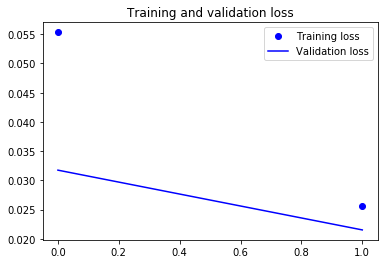

In [31]:
loss = autoencoder_trian.history['loss']
val_loss = autoencoder_trian.history['val_loss']
epochs = range (epoch)
plt.figure()
plt.plot(epochs, loss,'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b',label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


Test images


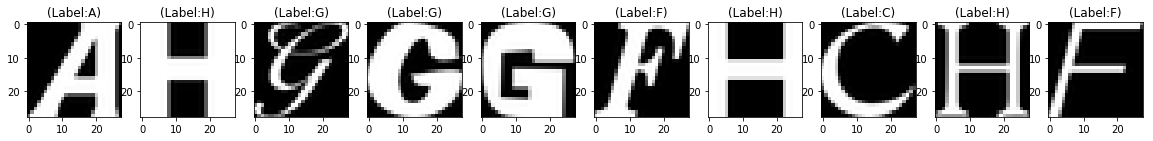

Test images with Noise


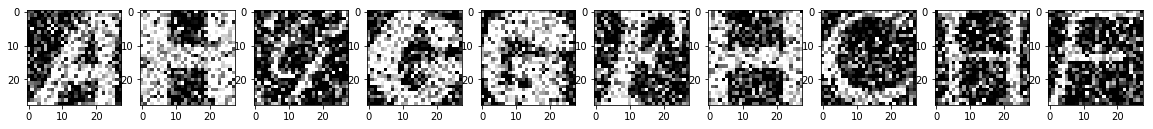

Reconstruction of Noisy Test Image


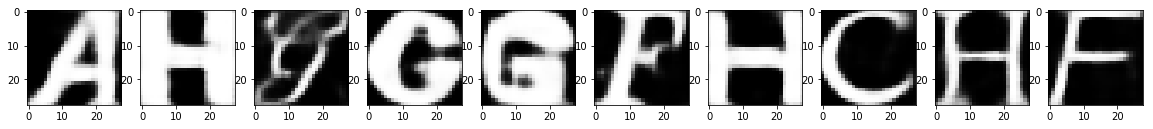

In [32]:
# predict test dataset
pred = autoencoder.predict(x_test_noisy)
plt.figure(figsize=(20,4))
print("Test images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(test_data[i,...,0], cmap='gray')
    curr_lbl = test_labels[i]
    plt.title("(Label:"+str(label_dict[curr_lbl])+")")
plt.show()

plt.figure(figsize=(20,4))
print("Test images with Noise")
for i in range(10,20,1):
    plt.subplot(2,10,i+1)
    plt.imshow(x_test_noisy[i,...,0],cmap='gray')
plt.show()

plt.figure(figsize=(20,4))
print("Reconstruction of Noisy Test Image")
for i in range(10,20,1):
    plt.subplot(2,10,i+1)
    plt.imshow(pred[i,...,0],cmap='gray')
plt.show()

In [33]:
import h5py 

autoencoder.save("C:\\Users\\HyunA\\PycharmProjects\\CNN_Deeplearning\\Models\\AutoEncoder_tutorial\\denosinge_autoencoder.h5")

In [34]:
autoencoder.save_weights("C:\\Users\\HyunA\\PycharmProjects\\CNN_Deeplearning\\Models\\AutoEncoder_tutorial\\denosinge_autoencoder_weights.h5")